### This Jupyter Notebook is owned by Vince Vertulfo and Daryl Tang

In [1]:
# Blue -info
# Yellow - warning
# Red - danger
# Green - success

<div class="alert alert-block alert-info">
<b>Importing Necessary Libraries:</b> 
</div>

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date, timedelta
import seaborn as sns

import squarify #for visualizing treemap layout
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

<div class="alert alert-block alert-info">
<b>Loading Data:</b> 
</div>

In [3]:
df = pd.read_excel("dataset/Online Retail.xlsx")

In [4]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

<div class="alert alert-block alert-info">
<b>Data Cleaning and Exploration:</b> 
</div>

In [5]:
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns")

Dataset has 541909 rows and 8 columns


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df['CustomerID'] = df['CustomerID'].apply(lambda x: "{:.0f}".format(x) if not pd.isnull(x) else x)

In [8]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [9]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829,541909,541909.000000
unique,25900.0,4070,4223,NaN,23260,NaN,4372,38,NaN
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,17841,United Kingdom,NaN
freq,1114.0,2313,2369,NaN,1114,NaN,7983,495478,NaN
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,NaN,NaN,17.987795
std,NaN,NaN,NaN,218.081158,NaN,96.759853,NaN,NaN,378.810824
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,NaN,NaN,-168469.600000
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,NaN,NaN,3.400000


<div class="alert alert-block alert-warning">
<b>Missing Data:</b> There are 135080 rows that don't have CustomerID
</div>

In [10]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
TotalPrice          0
dtype: int64

In [11]:
# Dropping the rows with NaN
df.dropna(inplace=True)

In [12]:
print(f"Updated: Dataset has {df.shape[0]} rows and {df.shape[1]} columns")

Updated: Dataset has 406829 rows and 9 columns


<div class="alert alert-block alert-info">
<b>RFM (Recency-Frequency-Monetary) Analysis:</b> 
</div>

#### Extracting the date you want to reference from for recency. 

In [13]:
checker_date = df['InvoiceDate'].max() + timedelta(days=1)

#### Grouping the data by CustomerID

In [14]:
grouped_df = df.groupby('CustomerID').agg(
    {
        'InvoiceDate': lambda x: (checker_date - x.max()).days,
        'InvoiceNo': 'count',
        'TotalPrice' : 'sum'
    }).rename(columns={
        'InvoiceDate': 'Recency',
        'InvoiceNo' : 'Frequency',
        'TotalPrice' : 'Monetary'
    })

#### Now, we have our dataset grouped by CustomerID and have gotten the RFM Values.

In [15]:
grouped_df

,Recency,Frequency,Monetary
CustomerID,,,
12346,326,2,0.00
12347,2,182,4310.00
12348,75,31,1797.24
12349,19,73,1757.55
12350,310,17,334.40
...,...,...,...
18280,278,10,180.60
18281,181,7,80.82
18282,8,13,176.60


#### Let's try exploring the distribution of the data (HISTOGRAM)

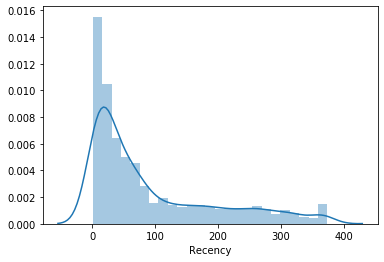

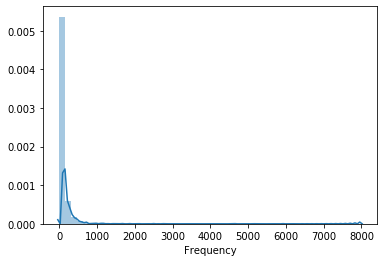

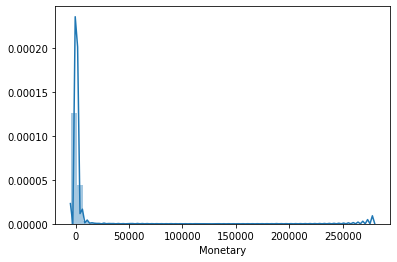

In [16]:
sns.distplot(grouped_df['Recency'])
plt.show()
sns.distplot(grouped_df['Frequency'])
plt.show()
sns.distplot(grouped_df['Monetary'])
plt.show()

#### Let's try exploring the distribution of the data (BOXPLOT)

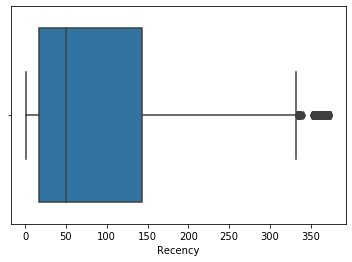

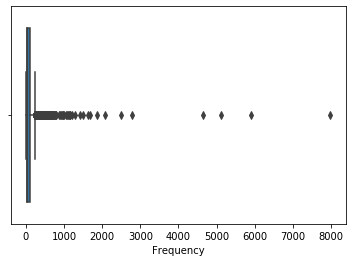

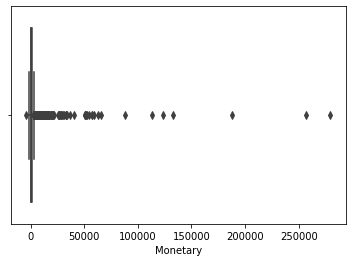

In [17]:
sns.boxplot(x=grouped_df['Recency'])
plt.show()
sns.boxplot(x=grouped_df['Frequency'])
plt.show()
sns.boxplot(x=grouped_df['Monetary'])
plt.show()

#### Now, let's get the quantiles for each customer using panda's qcut()

- Qcut() syntax (Series, no of quantiles, labels)

In [18]:
grouped_df['r_score'] = pd.qcut(grouped_df['Recency'], 4, ['1', '2', '3', '4'])
grouped_df['f_score'] = pd.qcut(grouped_df['Frequency'], 4, ['4', '3', '2', '1'])
grouped_df['m_score'] = pd.qcut(grouped_df['Monetary'], 4, ['4', '3', '2', '1'])

In [19]:
grouped_df['rfm_total'] = grouped_df['r_score'].astype(str) + grouped_df['f_score'].astype(str) + grouped_df['m_score'].astype(str)
grouped_df['rfm_sum'] = grouped_df['r_score'].astype(int) + grouped_df['f_score'].astype(int) + grouped_df['m_score'].astype(int)

#### We now have our rfm_total and rfm_sum values

In [20]:
grouped_df.head()

,Recency,Frequency,Monetary,r_score,f_score,m_score,rfm_total,rfm_sum
CustomerID,,,,,,,,
12346,326,2,0.00,4,4,4,444,12
12347,2,182,4310.00,1,1,1,111,3
12348,75,31,1797.24,3,3,1,331,7
12349,19,73,1757.55,2,2,1,221,5
12350,310,17,334.40,4,4,3,443,11


In [21]:
grouped_df['rfm_total'].nunique()

62

#### Time to put descriptors based on their rfm_sum scores since rfm_total just has so many possible values

In [22]:
def add_descriptors(rfm_sum):
    if(rfm_sum <= 3):
        return "Can't lose them"
    elif((rfm_sum <= 4) & (rfm_sum > 3)):
        return "Champions"
    elif((rfm_sum <= 5) & (rfm_sum > 4)):
        return "Loyal"
    elif((rfm_sum <= 6) & (rfm_sum > 5)):
        return "Potential"
    elif((rfm_sum <= 7) & (rfm_sum < 6)):
        return "Promising"
    else:
        return "Need Attention or Ignore"

In [23]:
grouped_df['Descriptors'] = grouped_df['rfm_sum'].apply(lambda x: add_descriptors(x))

In [24]:
grouped_df.head()

,Recency,Frequency,Monetary,r_score,f_score,m_score,rfm_total,rfm_sum,Descriptors
CustomerID,,,,,,,,,
12346,326,2,0.00,4,4,4,444,12,Need Attention or Ignore
12347,2,182,4310.00,1,1,1,111,3,Can't lose them
12348,75,31,1797.24,3,3,1,331,7,Need Attention or Ignore
12349,19,73,1757.55,2,2,1,221,5,Loyal
12350,310,17,334.40,4,4,3,443,11,Need Attention or Ignore


#### Count per descriptor

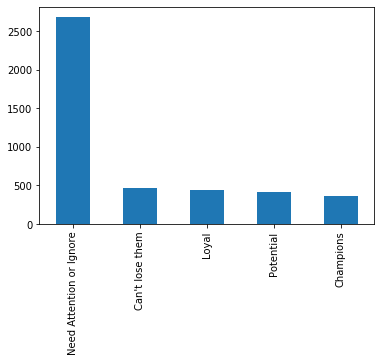

In [25]:
grouped_df['Descriptors'].value_counts().plot(kind='bar')

In [42]:
descriptors_df = grouped_df.groupby('Descriptors').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(2)

In [43]:
descriptors_df.head()

Recency Frequency Monetary      
                            mean      mean     mean count
Descriptors                                              
Can't lose them             6.69    371.83  8850.73   471
Champions                  20.51    193.91  3845.73   368
Loyal                      31.28    115.26  1894.05   440
Need Attention or Ignore  134.15     28.76   492.12  2682
Potential                  44.23     79.03  1369.56   411

#### Plotting our segments

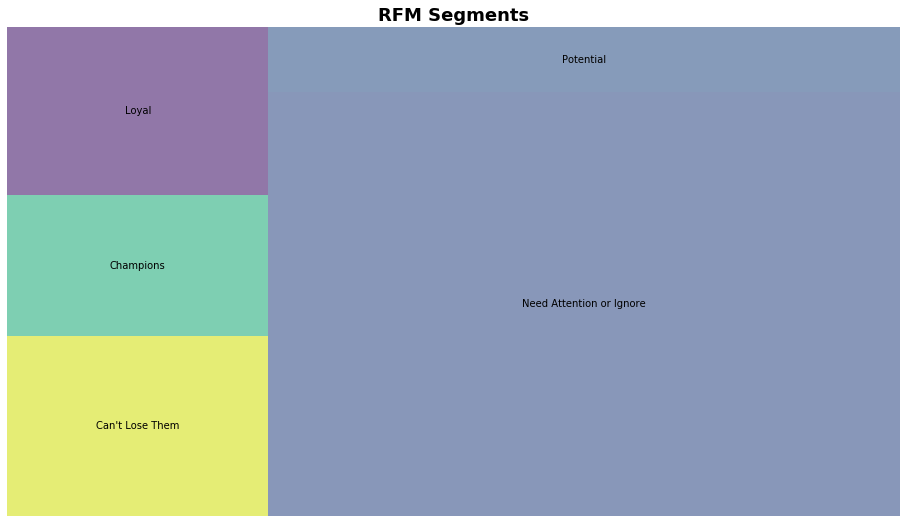

In [44]:
descriptors_df.columns = descriptors_df.columns.droplevel()
descriptors_df.columns = ['RecencyMean','FrequencyMean', 'MonetaryMean', 'Count']

#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=descriptors_df['Count'], 
              label=['Can\'t Lose Them',
                     'Champions',
                     'Loyal',
                     'Need Attention or Ignore',
                     'Potential'
                     ], alpha=.6 )

plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

#### Running KMeans Clustering

In [100]:
X = StandardScaler().fit_transform(grouped_df.loc[:, ['Recency', 'Frequency', 'Monetary']])
X

array([[ 2.32202285, -0.3917197 , -0.23100099],
       [-0.89373323,  0.38265697,  0.29343167],
       [-0.1691956 , -0.26695902, -0.01231622],
       ...,
       [-0.83418219, -0.34439668, -0.20951263],
       [-0.87388289,  2.85205812,  0.02390005],
       [-0.48680114, -0.0991774 , -0.00744423]])

In [95]:
K = range(1,15)
sum_of_squared_distances = []
kmeans_df = pd.DataFrame([])
silhouette_score = []
calinski_harabasz_score = []


for k in K:
    print(k)
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(X)
    y_hat = k_means.predict(X)
    labels = k_means.labels_
    sum_of_squared_distances.append(k_means.inertia_)
    if(k>1):
        silhouette_score.append(metrics.silhouette_score(X, labels, metric = 'euclidean'))
        calinski_harabasz_score.append(metrics.calinski_harabasz_score(X, labels))

1
2
3
4
5
6
7
8
9
10
11
12
13
14


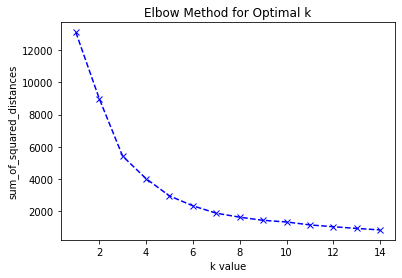

In [111]:
plt.plot(K, sum_of_squared_distances, 'bx--')
plt.xlabel('k value')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method for Optimal k')
plt.show()

In [96]:
kmeans_df['k'] = range(2,15)
kmeans_df['silhoutte_score'] = silhouette_score
kmeans_df['calinski_harabasz_score'] = calinski_harabasz_score

In [97]:
kmeans_df

,k,silhoutte_score,calinski_harabasz_score
0,2,0.934464,2006.592161
1,3,0.600388,3113.162387
2,4,0.598142,3301.771871
3,5,0.615818,3782.183575
4,6,0.585696,4056.684183
5,7,0.523599,4396.370892
6,8,0.515411,4435.309339
7,9,0.508904,4491.214308
8,10,0.484929,4336.850888
9,11,0.423620,4607.540257


#### Based on the elbow plot, it seems 5 is the optimal number of K

In [116]:
k_means = KMeans(n_clusters=5)
model = k_means.fit(X)
y_hat = k_means.predict(X)
labels = k_means.labels_

In [117]:
print(f"Silhouette Score: {metrics.silhouette_score(X, labels, metric = 'euclidean')}")
print(f"Calinski Harabasz Score: {metrics.calinski_harabasz_score(X, labels)}")

Silhouette Score: 0.6160117259955692
Calinski Harabasz Score: 3782.18153866563


In [121]:
grouped_df['cluster'] = labels

In [125]:
grouped_df.groupby('cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean','count']
})

Recency    Frequency       Monetary      
               mean         mean           mean count
cluster                                              
0         43.227541    74.584918    1299.610968  3050
1          2.000000  5914.000000   64776.602500     4
2        249.581157    27.672575     466.381997  1072
3          9.000000  1013.400000  192103.854000     5
4         12.373444   501.896266   10857.531867   241

In [127]:
grouped_df.loc[grouped_df['cluster'] == 4]

,Recency,Frequency,Monetary,r_score,f_score,m_score,rfm_total,rfm_sum,Descriptors,cluster
CustomerID,,,,,,,,,,
12428,26,300,7877.20,2,1,1,211,4,Champions,4
12433,1,420,13375.87,1,1,1,111,3,Can't lose them,4
12451,11,355,8933.52,1,1,1,111,3,Can't lose them,4
12471,2,531,18740.92,1,1,1,111,3,Can't lose them,4
12472,31,391,6229.48,2,1,1,211,4,Champions,4
...,...,...,...,...,...,...,...,...,...,...
18109,2,454,7925.32,1,1,1,111,3,Can't lose them,4
18118,11,1284,5595.77,1,1,1,111,3,Can't lose them,4
18122,8,364,1826.21,1,1,1,111,3,Can't lose them,4
